In [1]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


#IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dataset= pd.read_csv('creditcard.csv')
dataset.head()
# In class 1 for fraudulent transactions, 0 otherwise

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#HANDLING CATEGORICAL DATA

In [4]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
dataset = pd.read_csv('creditcard.csv') 
x = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values 
labelencoder_X = LabelEncoder()
x[:,0] = labelencoder_X.fit_transform(x[:,0])
x[:,1] = labelencoder_X.fit_transform(x[:,1])
print(x)
#Here we are using LabelEncoder

[[ 0.00000000e+00  4.49280000e+04 -7.27811733e-02 ...  1.33558377e-01
  -2.10530535e-02  1.49620000e+02]
 [ 0.00000000e+00  1.90308000e+05  2.66150712e-01 ... -8.98309914e-03
   1.47241692e-02  2.69000000e+00]
 [ 1.00000000e+00  4.49820000e+04 -1.34016307e+00 ... -5.53527940e-02
  -5.97518406e-02  3.78660000e+02]
 ...
 [ 1.24590000e+05  2.36109000e+05 -3.01253846e-01 ...  4.45477214e-03
  -2.65608286e-02  6.78800000e+01]
 [ 1.24590000e+05  1.28561000e+05  5.30482513e-01 ...  1.08820735e-01
   1.04532821e-01  1.00000000e+01]
 [ 1.24591000e+05  1.03431000e+05 -1.89733337e-01 ... -2.41530880e-03
   1.36489143e-02  2.17000000e+02]]


In [5]:
x = dataset[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12',	'V13',	'V14',	'V15',	'V16',	'V17',	'V18',	'V19',	'V20',	'V21'	,'V22',	'V23',	'V24',	'V25',	'V26','V27',	'V28'	]]
#separate the other attributes from the predicting attribute

In [6]:
y = dataset[['Class']]
#separte the predicting attribute into Y for model training 

#GRAPHS

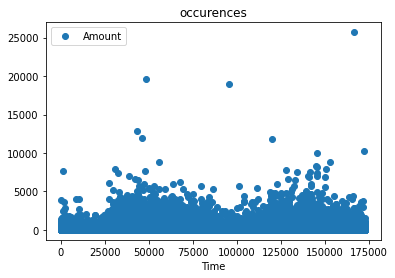

In [7]:
dataset.plot(x='Time', y='Amount' , style='o')
plt.title('occurences')
plt.show()

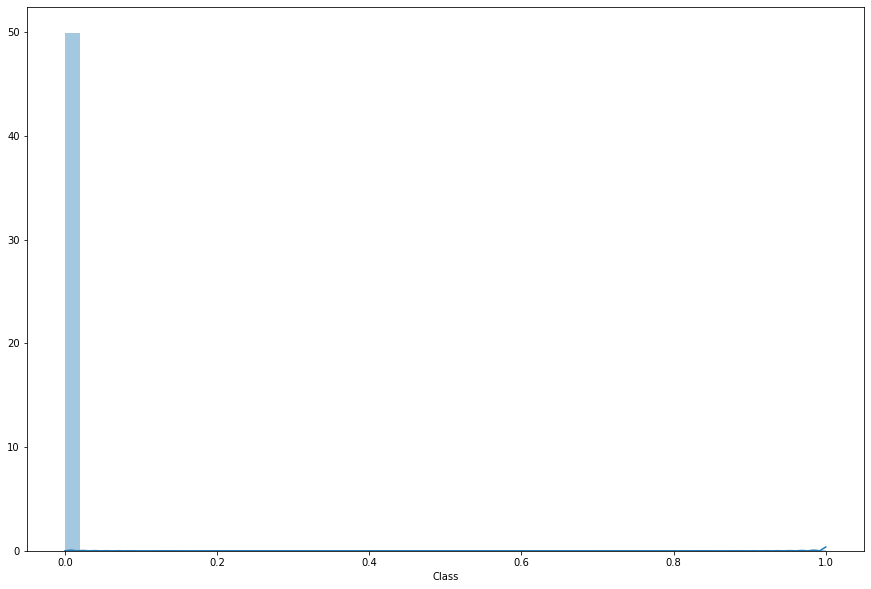

In [8]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seaborn.distplot(dataset['Class'])
plt.show()

#SPLITTING OF DATASET INTO TRAIN AND TEST SET

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

#NORMALIZING DATA

In [10]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)

# transform testing data
X_test_norm = norm.transform(x_test)

print(X_train_norm)
print(X_test_norm)

[[0.92765854 0.75384603 0.80071667 ... 0.35823502 0.65658631 0.33906135]
 [0.97518775 0.74009456 0.79312517 ... 0.56279193 0.64797653 0.3411726 ]
 [0.98933739 0.73939433 0.7754647  ... 0.24807282 0.6514884  0.34016734]
 ...
 [0.98095022 0.73060292 0.77703599 ... 0.34760283 0.64992833 0.3412243 ]
 [0.98675592 0.72181681 0.77882125 ... 0.38059922 0.64900085 0.34017174]
 [0.93831926 0.75047664 0.82356823 ... 0.36811236 0.65246324 0.34455712]]
[[0.94371538 0.75410214 0.78100038 ... 0.43060902 0.65309411 0.34581125]
 [0.94318027 0.7526404  0.78544342 ... 0.45138302 0.65218206 0.34623136]
 [0.9175248  0.71354094 0.78969764 ... 0.25766143 0.65821509 0.35385596]
 ...
 [0.97309737 0.71491762 0.70958397 ... 0.58777798 0.64303129 0.34089925]
 [0.99215057 0.74505958 0.72436384 ... 0.53848991 0.64699767 0.33931907]
 [0.99796161 0.72620269 0.75102425 ... 0.40473096 0.65017847 0.33961353]]


#ALGORITHM

In [11]:
model =LogisticRegression()
#loading the model constructor

#FITTING OF TRAINING DATA

In [12]:
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
print('Intercept is :',model.intercept_)

Intercept is : [-8.52041387]


In [14]:
print('Coefficient is :' ,model.coef_)

Coefficient is : [[ 0.05634186 -0.04748479  0.02864347  0.68895927  0.00780592 -0.10107519
  -0.04871149 -0.18447327 -0.21636813 -0.72852255  0.06198264  0.01643049
  -0.27013137 -0.53842135 -0.11502246 -0.12990055 -0.00546259 -0.07520044
   0.0303424  -0.24921952  0.37807731  0.51092904 -0.09418991  0.08693994
  -0.09104165  0.16411539 -0.63203324 -0.21155589]]


#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [15]:
predictions = model.predict(x_test)

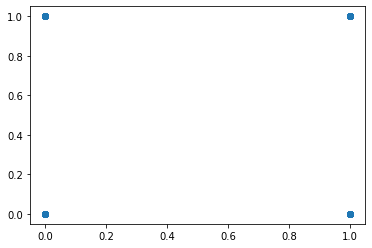

In [16]:
plt.scatter(y_test,predictions)
#to visualise the predictions and the test Y !!it is almost forming a linear line with less deviation

#EVALUATION

In [17]:
print('Mean abolute error is:', metrics.mean_absolute_error(y_test,predictions))
print('Mean squared error is:', metrics.mean_squared_error(y_test,predictions))
print('Root mean squared error is:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean abolute error is: 0.0007900003511112671
Mean squared error is: 0.0007900003511112671
Root mean squared error is: 0.02810694489109884


In [18]:
print(metrics.accuracy_score(y_test, predictions))

0.9992099996488887


#SAVING THE MODEL USING PICKLE LIBRARY

In [19]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(model) 

# Load the pickled model 
model_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
model_from_pickle.predict(x_test) 


array([0, 0, 0, ..., 0, 0, 0])

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
y_train = y_train[0:56962]
results =confusion_matrix(y_train, predictions)
print(results)

[[56792    72]
 [   98     0]]


Precision, Recall, Support, Fscore

In [21]:
import numpy
from sklearn.metrics import precision_recall_fscore_support


precision_recall_fscore_support(y_train, predictions, average='macro')

(0.4991386886974864, 0.49936691052335397, 0.49925277352884295, None)

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [22]:
results =confusion_matrix(y_test, predictions)
print(results)

[[56853     8]
 [   37    64]]


Precision, Recall, Support, Fscore

In [23]:
import numpy
from sklearn.metrics import precision_recall_fscore_support


precision_recall_fscore_support(y_test, predictions, average='macro')

(0.9441192554832913, 0.8167613361818058, 0.8697443960728948, None)